In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [22]:
from tools.utils import *

%matplotlib inline
import matplotlib.pyplot as plt

from time import time
from datasets.carla_aug import CarlaDatasetAugmented
from datasets.nuscenes_aug import NuScenesDatasetAugmented
from datasets.nuscenes import get_nusc

In [23]:
nusc, dataroot = get_nusc("mini", "../../data/nuscenes")
val_data = NuScenesDatasetAugmented(nusc, False)

In [24]:
carla_data = CarlaDatasetAugmented("../../data/carla/train", False)

In [62]:
t_0 = time() 
images, intrinsics, extrinsics, labels, oods, cam_ood = carla_data[40]
time() - t_0

[   0.    0. -180.]


  0%|          | 0/50 [00:00<?, ?it/s]

166.64261627197266

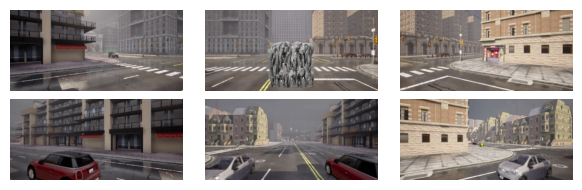

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.imshow(images[i].permute(1, 2, 0).numpy())
    
plt.tight_layout()

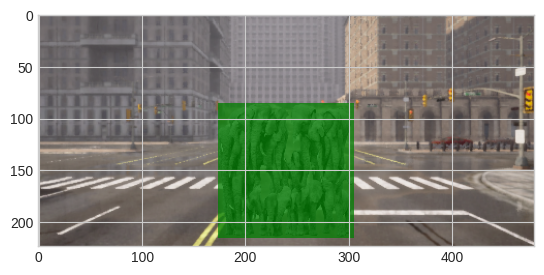

In [66]:
plt.imshow(images[1].permute(1, 2, 0).numpy())
plt.imshow(np.ma.masked_where(cam_ood == 0, cam_ood), 'ocean', alpha=.75)

/tmp/ipykernel_1731202/2233875358.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  l_image = map_rgb(torch.tensor(labels), ego=True) / 255


(-0.5, 199.5, 199.5, -0.5)

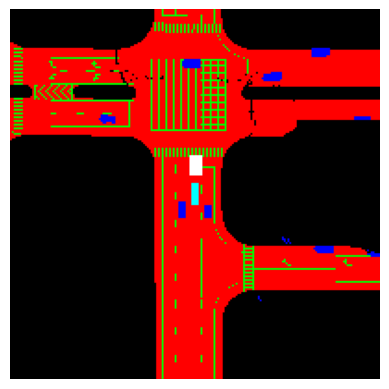

In [18]:
l_image = map_rgb(torch.tensor(labels), ego=True) / 255
l_image[oods == 1, :] = 1
plt.imshow(l_image)
plt.axis("off")